In [88]:
import sklearn.datasets as datasets
import numpy as np
import re
import pandas as pd
import seaborn as sns
import os
from numpy import asarray
import matplotlib.pyplot as plt
from PIL import Image
import cv2

## Getting our dataset

In [89]:
# Path where our data is located
base_path = "./asl_dataset/"

# Dictionary to save our 36 classes
categories = {  0: "0",
                1: "1",
                2: "2",
                3: "3",
                4: "4",
                5: "5",
                6: "6",
                7: "7",
                8: "8",
                9: "9",
                10: "a",
                11: "b",
                12: "c",
                13: "d",
                14: "e",
                15: "f",
                16: "g",
                17: "h",
                18: "i",
                19: "j",
                20: "k",
                21: "l",
                22: "m",
                23: "n",
                24: "o",
                25: "p",
                26: "q",
                27: "r",
                28: "s",
                29: "t",
                30: "u",
                31: "v",
                32: "w",
                33: "x",
                34: "y",
                35: "z",
            }

def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(
        lambda x: x[re.search("_", x).start() + 1 : re.search("_", x).start() + 2]
        + "/"
        + x
    )
    return df


# list conatining all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir(base_path + categories[category])
    filenames_list = filenames_list + filenames
    categories_list = categories_list + [category] * len(filenames)

df = pd.DataFrame({"filename": filenames_list, "category": categories_list})
df = add_class_name_prefix(df, "filename")

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [90]:
df.head()

,filename,category
0,8/hand2_8_left_seg_5_cropped.jpeg,8
1,5/hand4_5_bot_seg_1_cropped.jpeg,5
2,h/hand3_h_dif_seg_1_cropped.jpeg,17
3,t/hand4_t_bot_seg_5_cropped.jpeg,29
4,l/hand1_l_bot_seg_2_cropped.jpeg,21


In [91]:
pixel_arrays = []
for i,img in enumerate(df["filename"]):
    img = Image.open(base_path+img)  
    numpydata = asarray(img)
    pixel_arrays.append(numpydata)
df["pixel_data"] = pixel_arrays

In [92]:
df.head()

,filename,category,pixel_data
0,8/hand2_8_left_seg_5_cropped.jpeg,8,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,5/hand4_5_bot_seg_1_cropped.jpeg,5,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,h/hand3_h_dif_seg_1_cropped.jpeg,17,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,t/hand4_t_bot_seg_5_cropped.jpeg,29,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,l/hand1_l_bot_seg_2_cropped.jpeg,21,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [93]:
gray_scale = []
for data in df["pixel_data"]:
    gray_data = data.mean(axis=2)
    gray_scale.append(gray_data.astype(np.uint8))

df["pixel_data"] = gray_scale


In [94]:
df.head()

,filename,category,pixel_data
0,8/hand2_8_left_seg_5_cropped.jpeg,8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,5/hand4_5_bot_seg_1_cropped.jpeg,5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,h/hand3_h_dif_seg_1_cropped.jpeg,17,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,t/hand4_t_bot_seg_5_cropped.jpeg,29,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,l/hand1_l_bot_seg_2_cropped.jpeg,21,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [95]:
freq = {}
for cat in df["category"].unique():
    for val in df["category"]:
        if val == cat:
            if cat not in freq:
                freq[cat] = 1
            else:
                freq[cat] += 1
freq.keys()
freq.values()

dict_values([70, 70, 70, 65, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70])

In [96]:
df["pixel_data"][0].shape

(400, 400)

## Extracting the keypoints

In [97]:
sift = cv2.SIFT_create()

keypoints = []
descriptors = []

In [98]:
for img in df["pixel_data"]:
    kp, des = sift.detectAndCompute(img, None)
    
    keypoints.append(kp)
    descriptors.append(des)

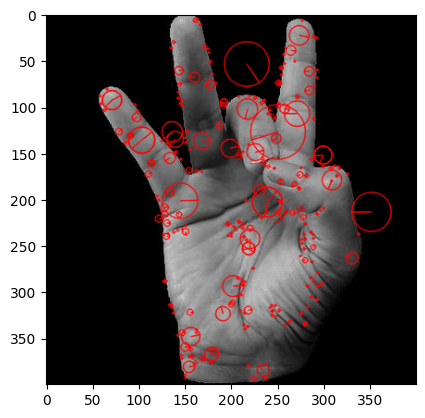

[[ 9.  0.  1. ...  8.  1.  0.]
 [16.  0.  0. ...  9.  0.  0.]
 [26.  1.  0. ...  0.  0.  0.]
 ...
 [ 7.  0.  0. ...  0.  0.  5.]
 [62. 17.  0. ...  3.  4. 29.]
 [ 0.  0.  0. ... 13.  2.  1.]]


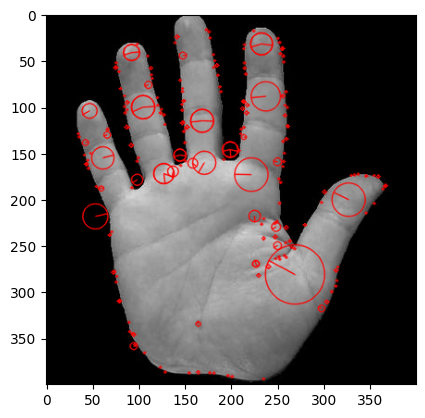

[[ 1.  0.  0. ...  0.  0. 11.]
 [ 4.  0.  0. ...  0.  0. 16.]
 [ 2.  0.  0. ...  0.  0.  5.]
 ...
 [11.  0.  0. ...  0.  0. 12.]
 [ 0.  0.  0. ...  0.  0.  1.]
 [ 0.  0.  0. ...  0.  0.  0.]]


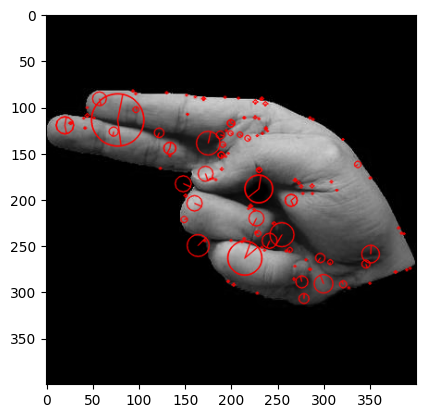

[[131.  72.   1. ...   0.   0.   0.]
 [  0.   0.   0. ... 127.  25.   3.]
 [ 64.   2.   0. ...   0.   0.   0.]
 ...
 [  5.   3.   0. ...   3.   0.   1.]
 [  2.   0.   0. ...   0.   0.   5.]
 [  6.   2.   0. ...   0.   0.   2.]]


In [99]:
output_image = []
for x in range(3):
    output_image.append(cv2.drawKeypoints(df["pixel_data"][x], keypoints[x], 0, (255, 0, 0),
                                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))
    plt.imshow(output_image[x], cmap='gray')
    plt.show()
    print(descriptors[x])

## The Codebook

In [100]:
np.random.seed(0)

sample_idx = np.random.randint(0, len(df)+1, 1000).tolist()

descriptors_sample = []

for n in sample_idx: # We get the descriptors of 1000 random shapes to establish the codebook
    descriptors_sample.append(np.array(descriptors[n]))

In [101]:
all_descriptors = []

for img_descriptors in descriptors_sample:
    for descriptor in img_descriptors:
        all_descriptors.append(descriptor)

# We join all the descriptors 
all_descriptors = np.stack(all_descriptors)

In [102]:
all_descriptors.shape

(203439, 128)

## Kmeans

In [103]:
from sklearn.cluster import KMeans

k = 200
iters = 1

kmeans = KMeans(n_clusters=k, n_init=iters, max_iter=300, random_state=0) # K means para identificar dentro de los descriptores los k elementos característicos
kmeans.fit(all_descriptors)
codebook = kmeans.cluster_centers_
variance = kmeans.inertia_

## SVM

In [104]:
im_features = np.zeros((len(df["filename"]), k), dtype=np.float32)
for i in range(len(df["filename"])):
    for feature in descriptors[i]: #Para cada feature vemos a que cluster se acerca
        feature = feature.reshape(1, -1)
        idx = kmeans.predict(feature)
        im_features[i][idx] += 1

In [105]:
df["category"]

0        8
1        5
2       17
3       29
4       21
        ..
2510    17
2511    31
2512    19
2513    23
2514    13
Name: category, Length: 2515, dtype: int64

In [106]:
#import standard scaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


#Normalizo los datos. TODO: Revisar si es necesario
scaler = StandardScaler().fit(im_features)
im_features = scaler.transform(im_features)


x_train, x_test, y_train, y_test = train_test_split(im_features, df["category"],train_size=0.6,shuffle=True,random_state=25)

svm = SVC(kernel='linear', C=1.0, gamma='scale')
svm.fit(x_train, y_train)


SVC(kernel='linear')

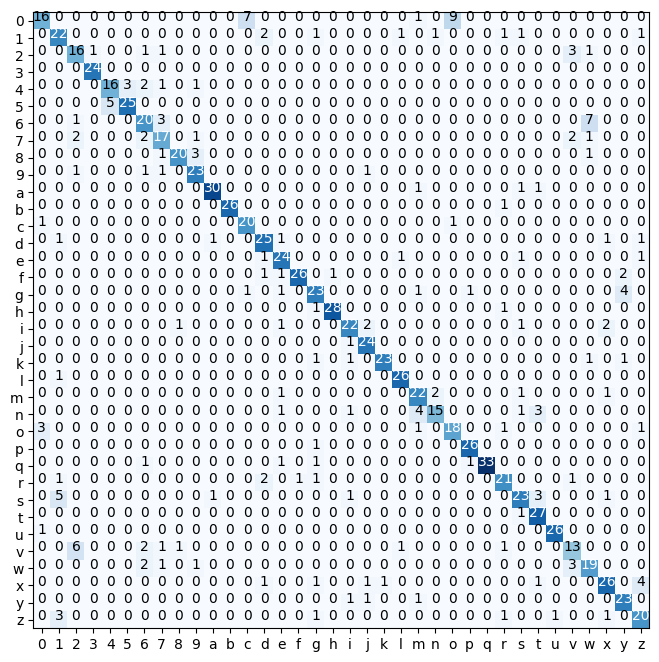

In [115]:
from sklearn.metrics import confusion_matrix

y_pred = svm.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2.0 else "black")
plt.xticks(np.array([i for i in range(cm.shape[0])]),categories.values())
plt.yticks(np.array([i for i in range(cm.shape[0])]),categories.values())

plt.show()


In [108]:
def predict_image(img_path,normalizer,km):
    img = Image.open(img_path)  
    numpydata = asarray(img)

    if len(pixel_arrays)==3:
        gray_data = numpydata.mean(axis=2)
        gray_data = gray_data.astype(np.uint8)
    else:
        gray_data = numpydata.astype(np.uint8)

    kp, des = sift.detectAndCompute(gray_data, None)

    im_features = np.zeros(k, dtype=np.float32)
    
    for feature in des: #Para cada feature vemos a que cluster se acerca
        feature = feature.reshape(1, -1)
        idx = km.predict(feature)
        im_features[idx] += 1
    
    im_features = normalizer.transform(im_features.reshape(1,-1))

    y_pred = svm.predict(im_features)
    
    return categories[y_pred[0]]


In [109]:
predict_image("asl_dataset/d/hand1_d_bot_seg_1_cropped.jpeg",scaler,kmeans)

'd'

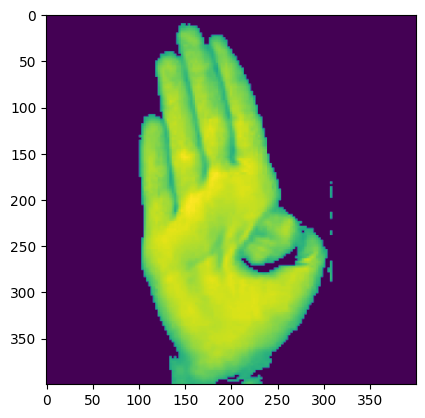

In [110]:
plt.imshow(plt.imread("hand.png"))

In [111]:
predict_image("hand.png",scaler,kmeans)

'p'

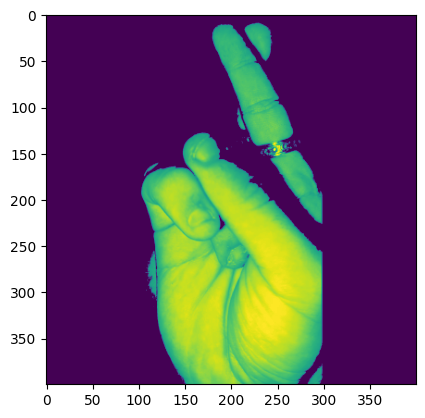

In [119]:
plt.imshow(plt.imread("hand_Marc_r.png"))

In [120]:
predict_image("hand_Marc_r.png",scaler,kmeans)

'g'